# TEST

In [1]:
!pwd
isLocalServer = True

%load_ext autoreload
%autoreload 2
%matplotlib inline
import json, sys, os

if isLocalServer is True:
  print(f'This is in the local server, therefore your folder path should be added to the system path.')
  
  sys_path_to_be_added = '/notebook/personal/ksuchoi216/faceID-model/'
  if not sys_path_to_be_added in sys.path:
    sys.path.insert(0, sys_path_to_be_added)
    os.chdir(sys_path_to_be_added)

  print(f'System path as follows:')
  for path in sys.path:
    print(f'    {path}')

from utils import load_config
cfg = load_config('config_test-various-face-extraction.json')

/notebook
This is in the local server, therefore your folder path should be added to the system path.
System path as follows:
    /notebook/personal/ksuchoi216/faceID-model/
    /notebook
    /root/.pyenv/versions/3.9.1/lib/python39.zip
    /root/.pyenv/versions/3.9.1/lib/python3.9
    /root/.pyenv/versions/3.9.1/lib/python3.9/lib-dynload
    
    /root/.pyenv/versions/python39/lib/python3.9/site-packages


In [2]:
import numpy as np
# loading numpy data

def loadNumpyImagesToDict(user_names_list, data_source_path)
  user_names = user_names_list
  data_source = data_source_path

  numpy_data = {}
  print(numpy_data)
  for i, user_name in enumerate(user_names):
    print(i, user_name)
    file_path = data_source + user_name + '_images.npy'
    numpy_data[user_name] = np.load(file_path, allow_pickle=True)

  print('example dimension: {}'.format(numpy_data['jhyoo'].shape))


{}
0 jhyoo
1 jhoh
2 jhongyoo
3 kschoi
example dimension: (230, 1080, 768, 3)


In [5]:
from PIL import Image
from deepface import DeepFace
import matplotlib.pyplot as plt


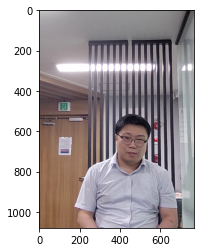

In [6]:
test = numpy_data['jhyoo'][0]

img = Image.fromarray(test)

plt.imshow(img)
plt.show()